## Population Pyramids

### Here I'm doing some basic visualization plots using bar charts and population pyramids

A population pyramid is a type of bar chart that shows the distribution of ages or age groups in a specific population. 
It usually shows gender as part of the pyramid but can also be augmented with other information such as race, marital status, education level etc. In this notebook I will manipulate a bar chart in ggplot2 by using different components of the layered grammar to produce a population pyramid. This type of visualization can also be used for other purposes whenever you want to show the distribution of a variable among two values of another variable. 

First I will take a look at simple bar chart and see how we can use the **position** adjustment component to create different types of bar charts. 

I will start by using the popular dimonds data set which is built into R. 

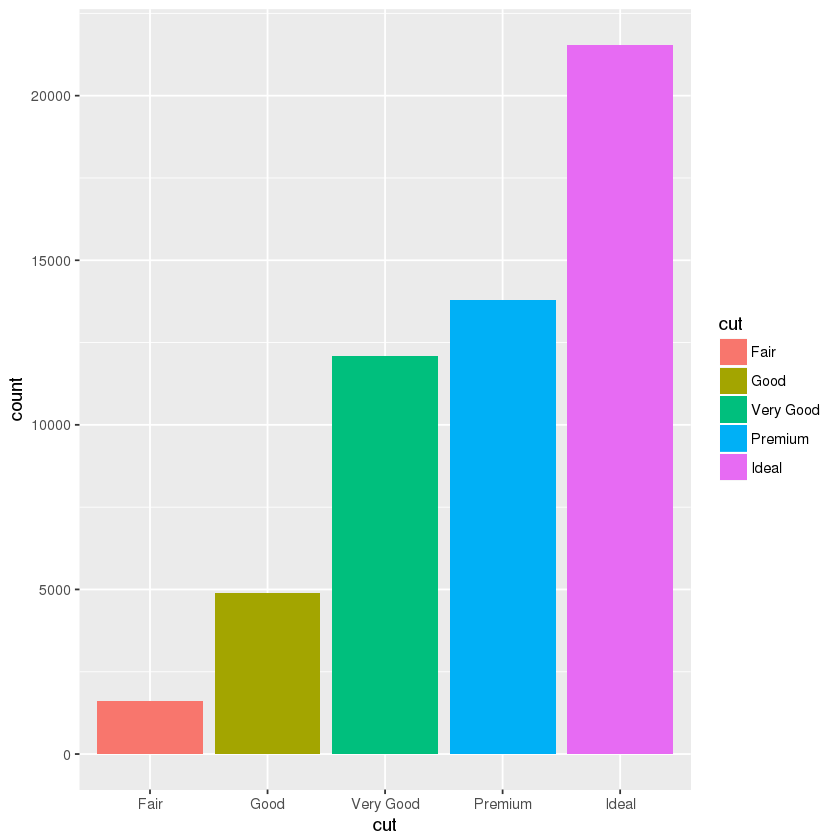

In [1]:
library(ggplot2)
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut))

*geom_bar()* geom counts the number of data points that have a particular *cut* and plots them as bars. Here color is not really important, but we can assign another attribute to the *fill* property. In that case, we'll have a *stacked* bar chart. 

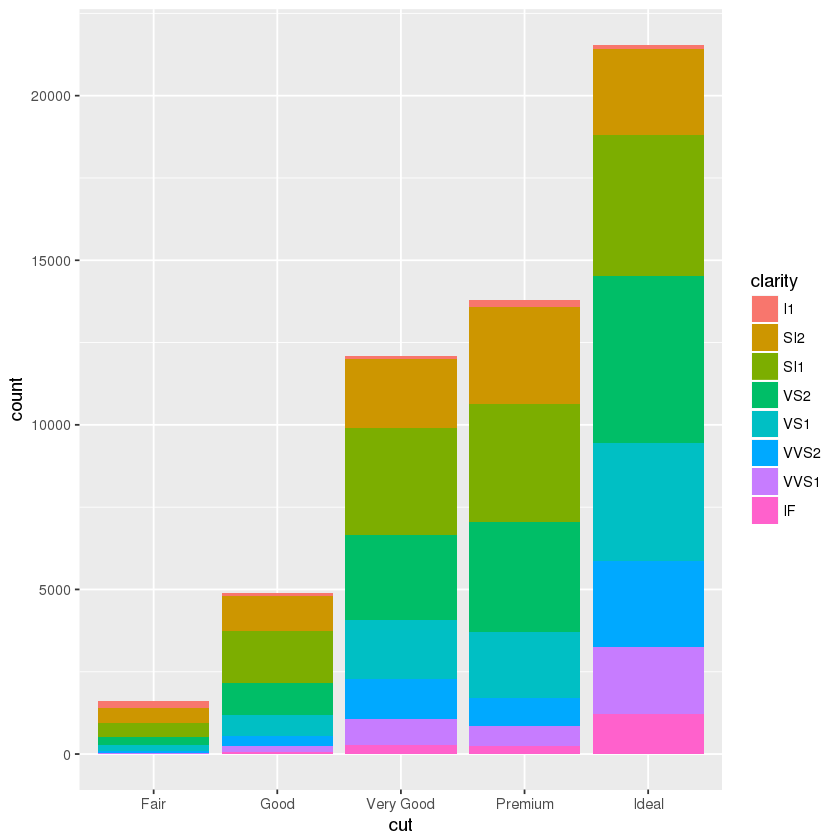

In [2]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity))

I can control the positioning of the bars by adding a position adjustment component. Position can be one of the following: "identity", "stack", "dodge", "fill", "jitter".

When position = "identity", ggplot2 will place each object exactly where it falls in the context of the graph.
For the bar chart, this would mean that each bar would start at y = 0 and would appear directly above the cut value that it describes. Since there are eight bars for each value of cut, many bars would overlap. It will *look like* a stacked bar chart, but the stacked heights will be inaccurate, because each bar starts from y = 0 and they overlap. 
position = "identity" is a good default position adjustment for many geoms such as geom_point(), but not very useful for bar chart in general. Later, we will see how to use it sensibly for the population pyramid.

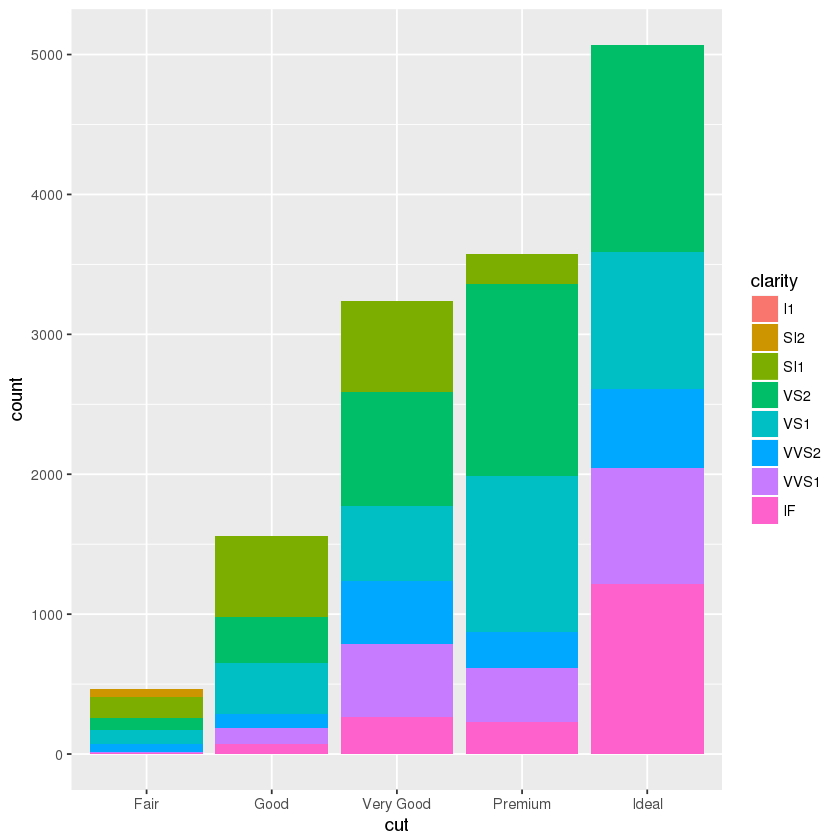

In [3]:
# this is not a stacked bar chart!
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "identity")

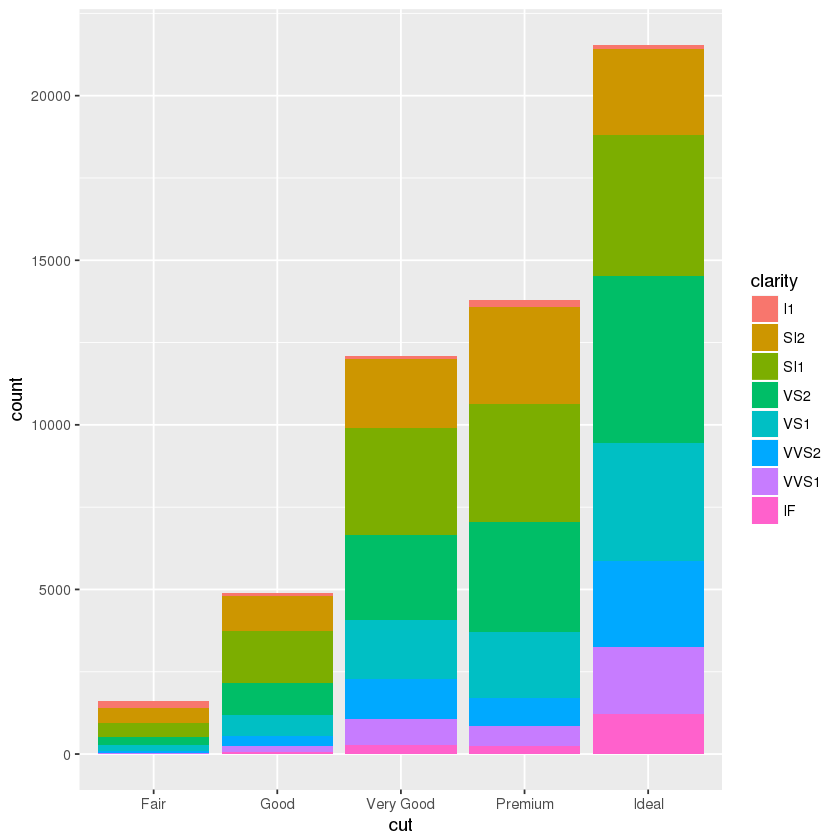

In [4]:
# "stack" position is the default for the geom_bar if there is an attribute assigned to fill, here we explicitly use the "stack".
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "stack") 

If we want to compare the percentage distribution of the groups, we can use *fill* position adjustment that will 
stretch bars to a 100% line and show the distribution.

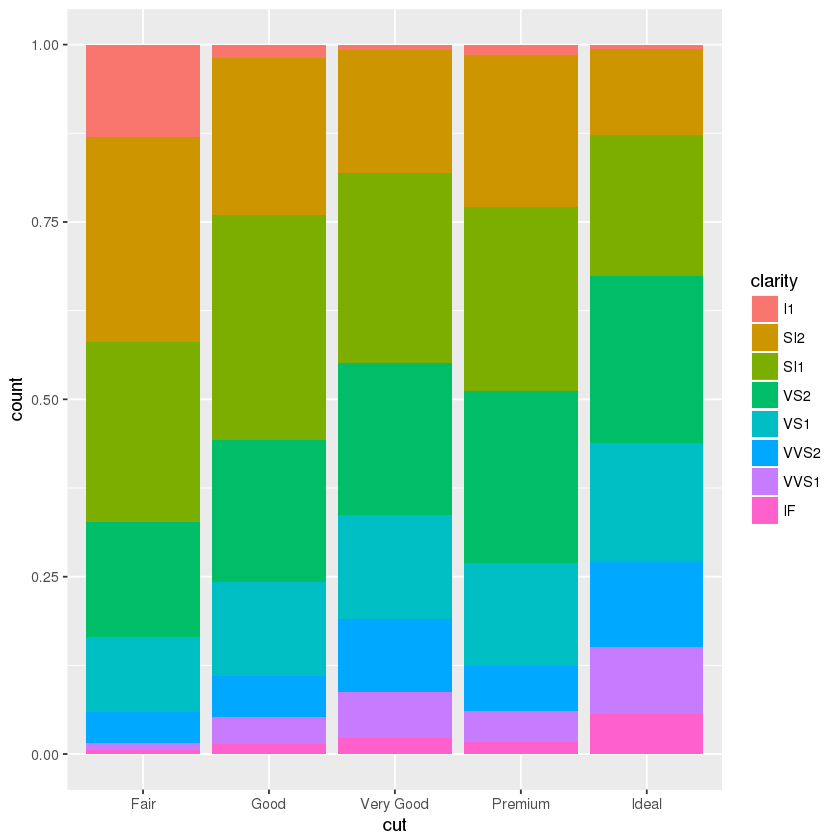

In [5]:
# position "fill" creates a bar chart that shows the relative frequencies across groups
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

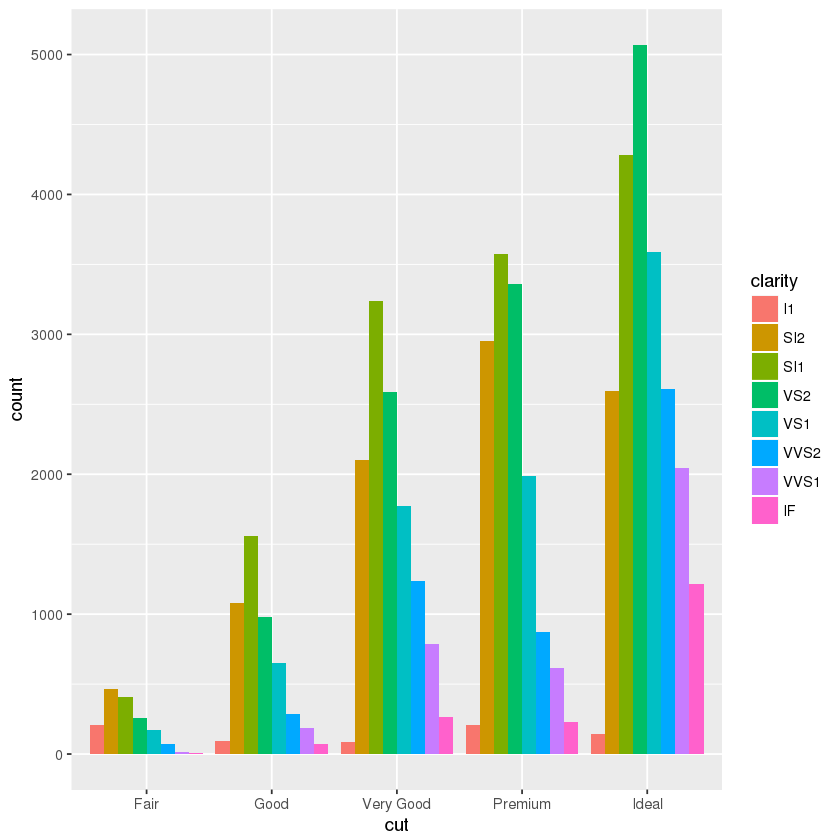

In [6]:
# If we want bars next to each other, we use "dodge"
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

And finally, we can flip the coordinate system by using *coord_flip()* coord as another component.

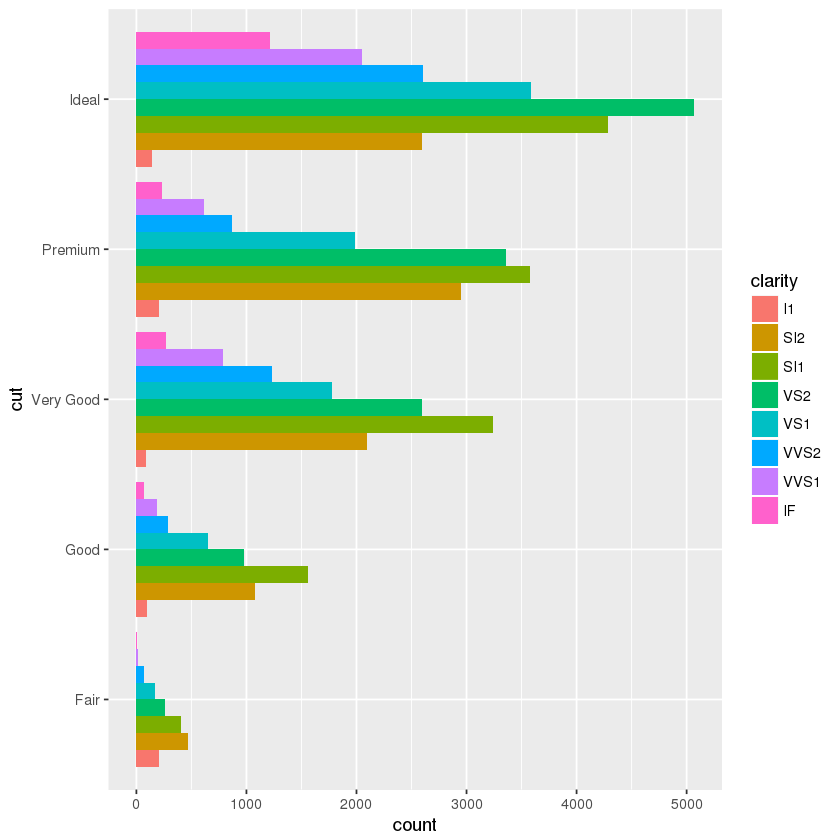

In [7]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") + coord_flip()

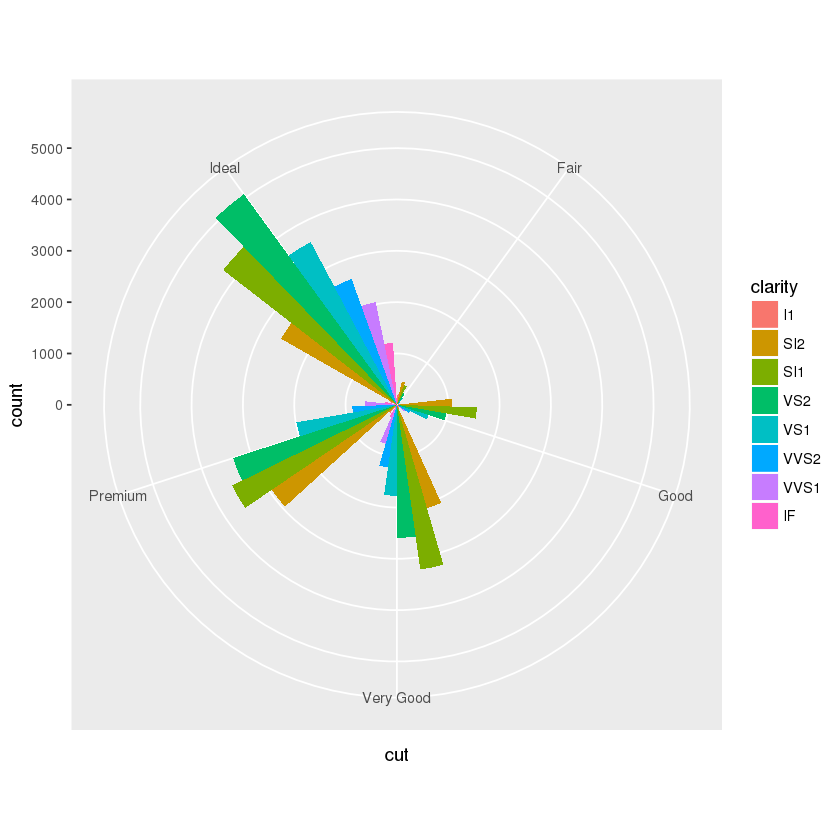

In [8]:
# We can also change the coordinate system from cartesian to polar.
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") + coord_polar()

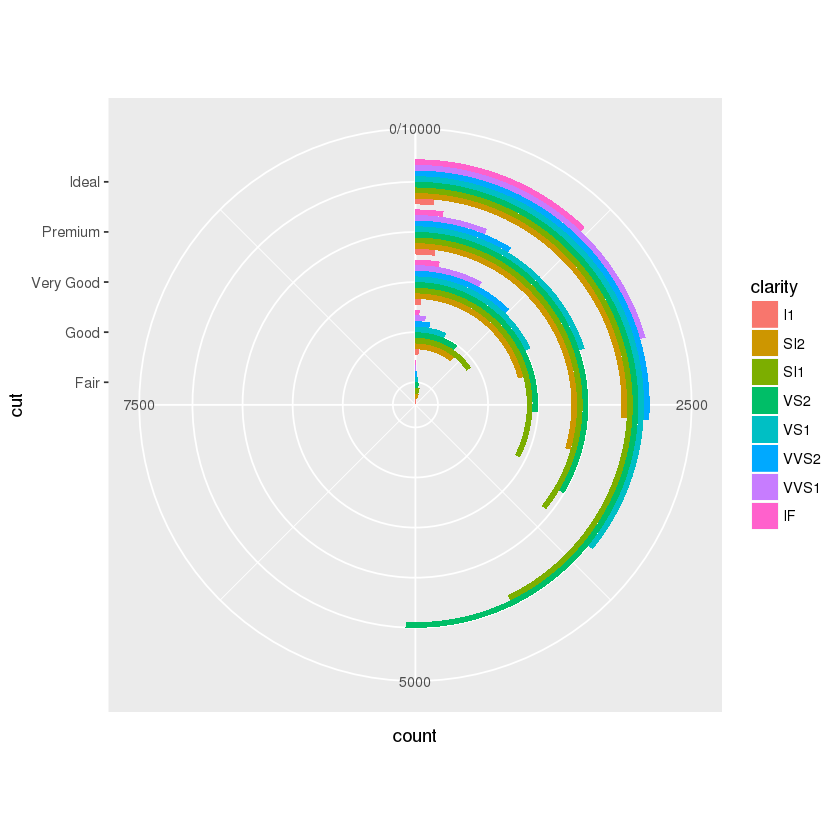

In [9]:
# above plot uses takes the x axis by default, we can assign the y axis to the angle of the polar coordinates, too.
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") + 
  coord_polar(theta="y") + 
  ylim(0,10000)

The difference between a bar chart, pie chart, and a coxcomb chart (a.k.a. polar area diagram, or Nightingale rose diagram) according to the modular approach of ggplot is the coordinate transformation that is used on the geom_bar. Let's see it.

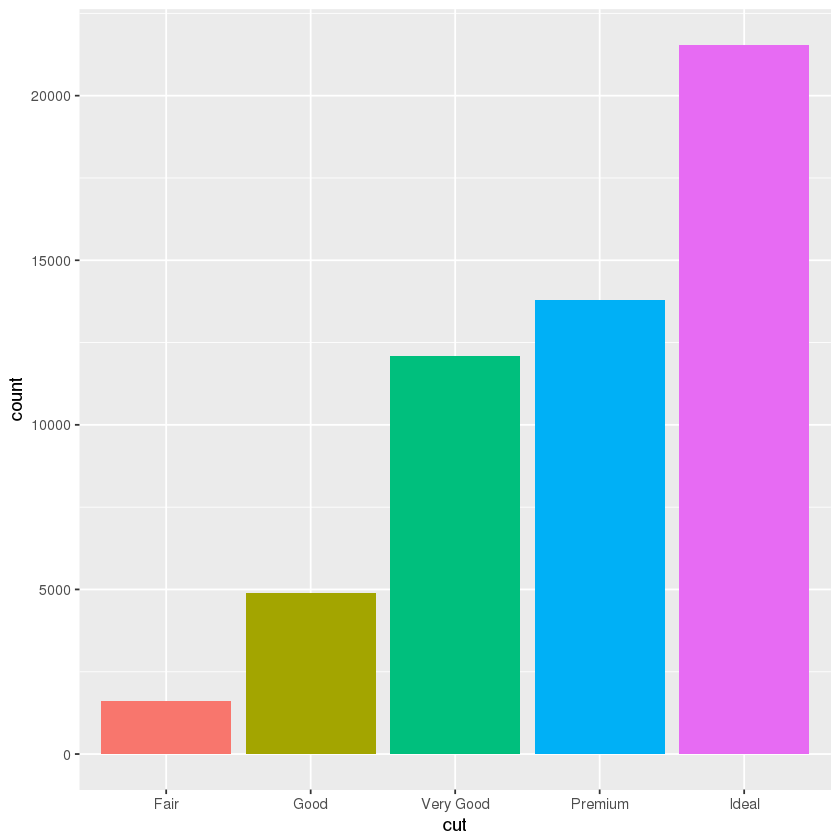

In [10]:
# bar chart
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut)) + theme(legend.position="none")

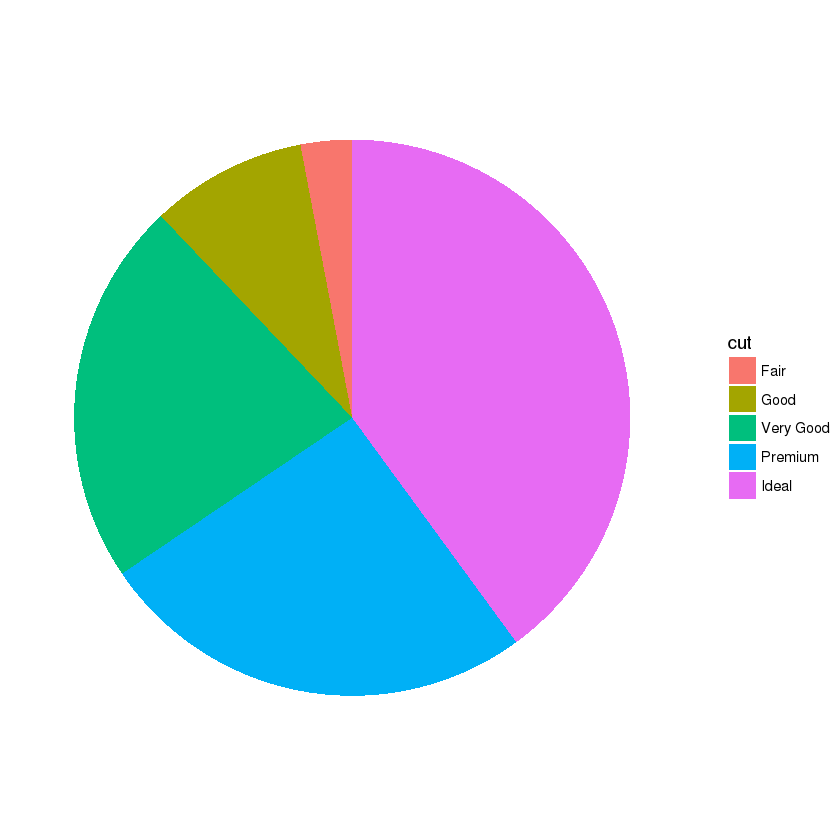

In [11]:
# pie chart
ggplot(data = diamonds) + geom_bar(mapping = aes(x = factor(1), fill = cut), width=1) + coord_polar(theta="y") +
theme_void()

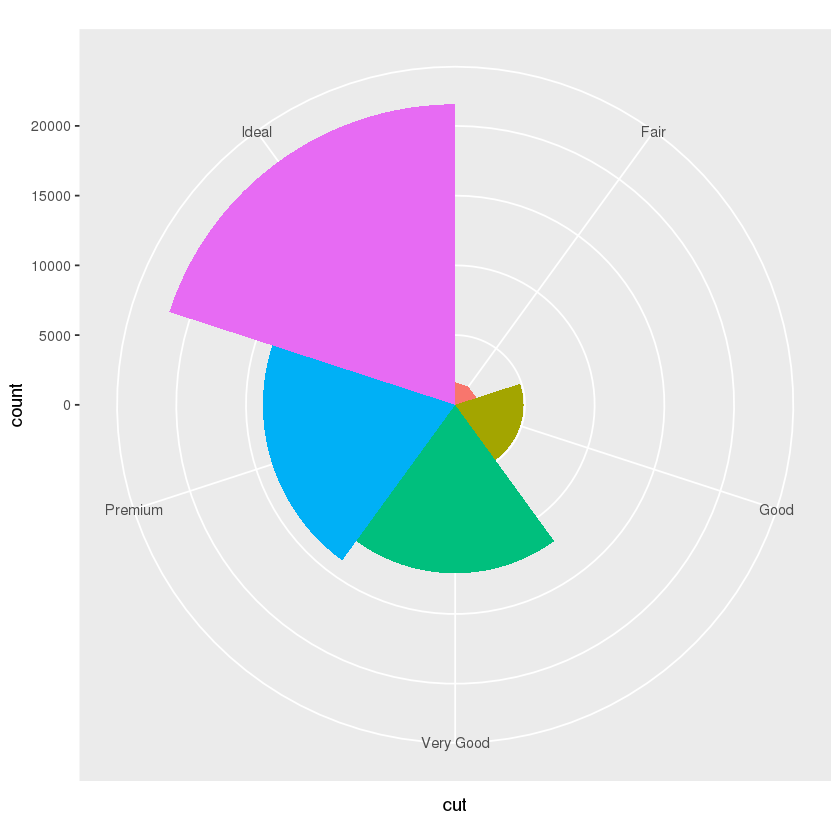

In [12]:
# polar area diagram
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut), width=1) + coord_polar(theta="x") +
 theme(legend.position="none")

Warning message:
“Ignoring unknown aesthetics: text”`geom_smooth()` using method = 'loess'


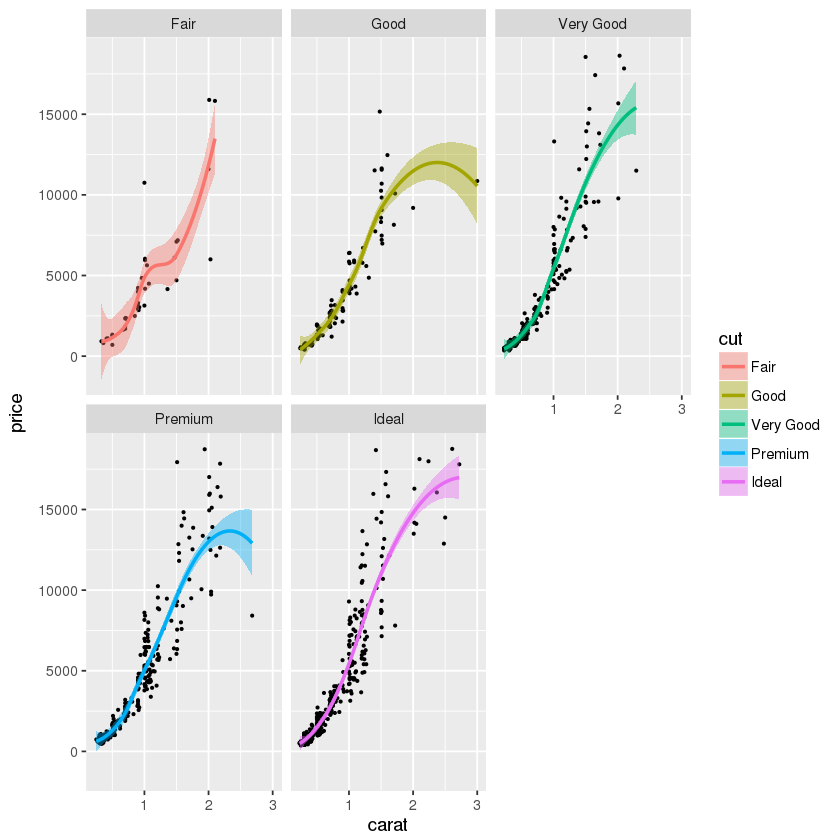

In [13]:

set.seed(100)
d <- diamonds[sample(nrow(diamonds), 1000), ]

p <- ggplot(data = d, aes(x = carat, y = price)) +
geom_point(aes(text = paste("Clarity:", clarity)), size = .5) +
geom_smooth(aes(colour = cut, fill = cut)) + facet_wrap(~ cut)


p

**Now that you know how to manipulate position and coordinates, let's create a population pyramid.**

In [14]:
# we'll use some census data. 
census = read.csv("../../../datasets/census/census2010pyr.csv")
head(census)
summary(census)

sex,age,pop
Male,0,2014276
Male,1,2030853
Male,2,2092198
Male,3,2104550
Male,4,2077550
Male,5,2072094


     sex           age             pop         
 Female:100   Min.   : 0.00   Min.   :   6073  
 Male  :100   1st Qu.:24.75   1st Qu.: 823401  
              Median :49.50   Median :1981561  
              Mean   :49.50   Mean   :1543461  
              3rd Qu.:74.25   3rd Qu.:2105907  
              Max.   :99.00   Max.   :2359941  

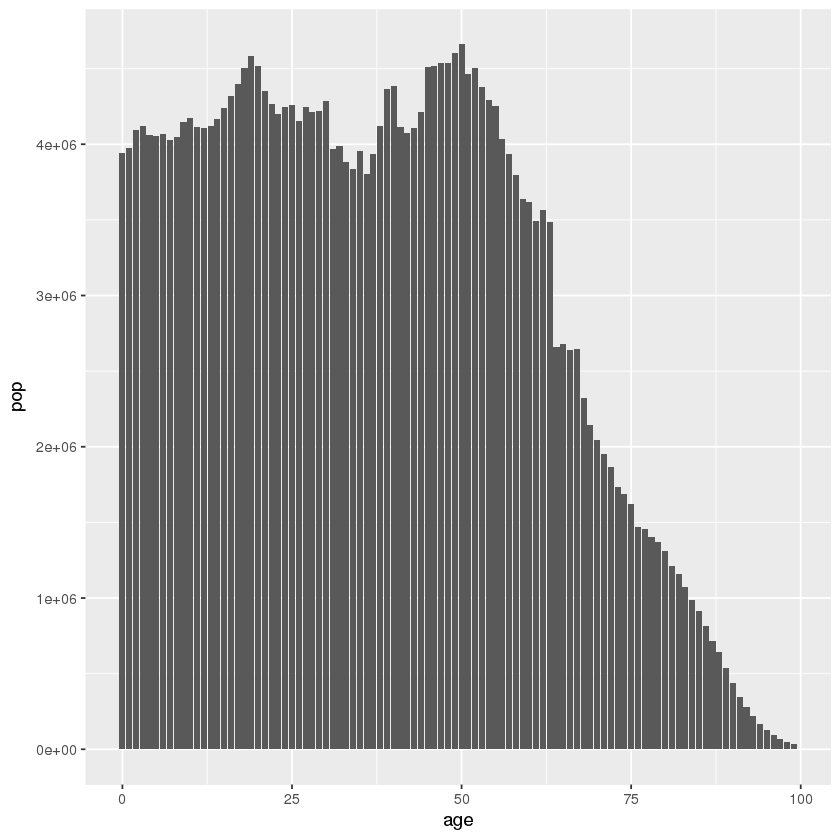

In [15]:
# First, start with a bar chart that shows the population for each age.
# Here, we have to use identity stat to draw the actual population number; we are not counting the number of different ages.
ggplot(census, aes(x=age, y=pop)) + geom_bar(stat="identity")

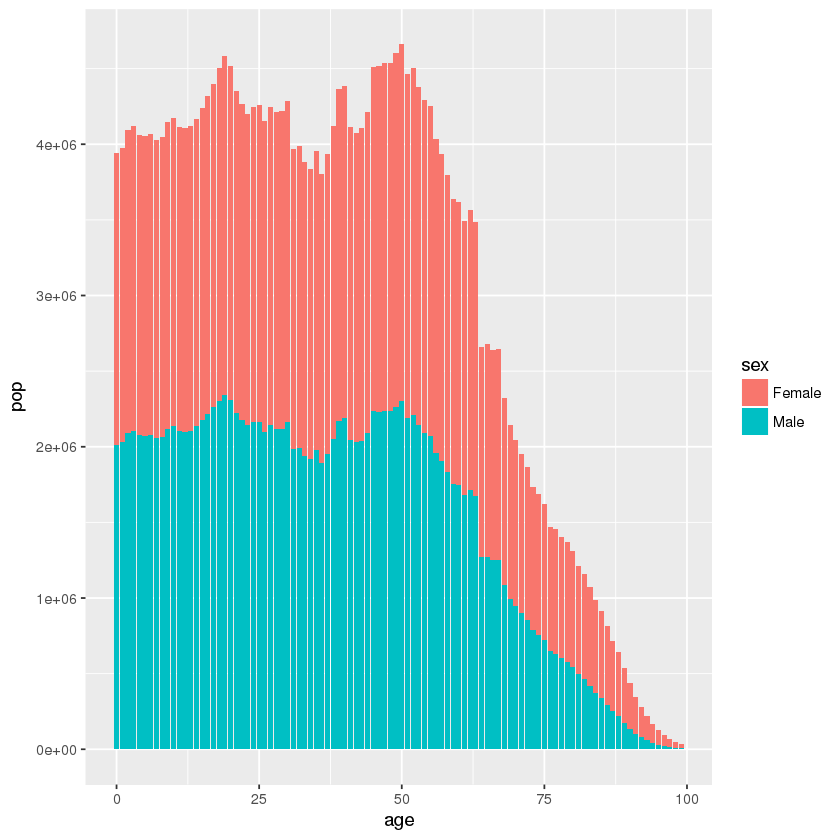

In [16]:
# Now, let's add the sex as fill
ggplot(census, aes(x=age, y=pop, fill=sex)) + geom_bar(stat="identity")

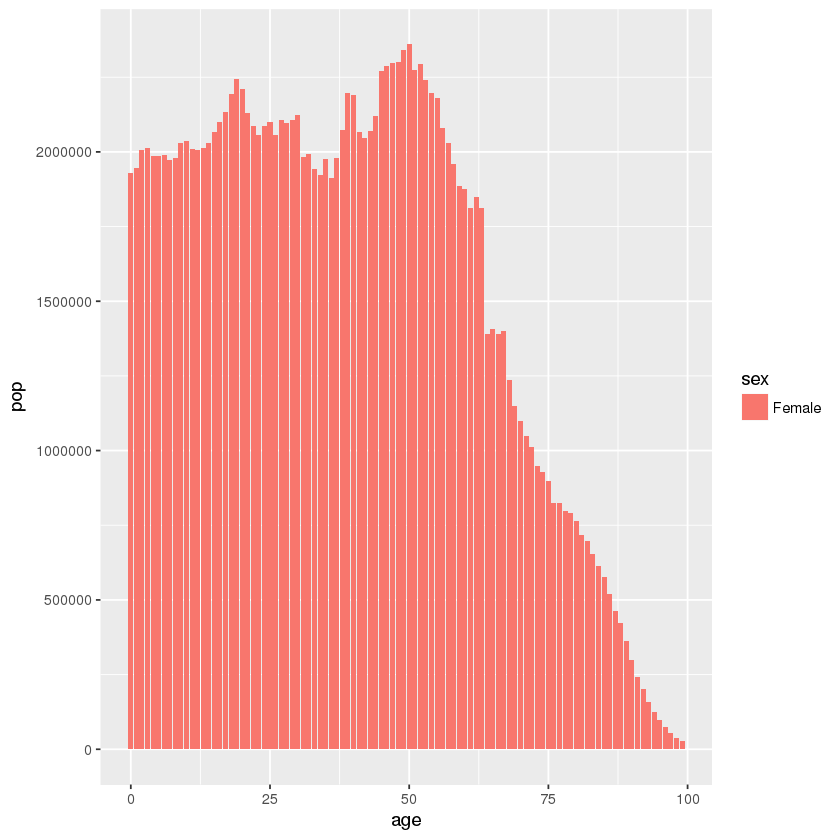

In [17]:
# Now, we want to separate males and females on different sides of the x axis
# Let's create a layer with females only. Here we see an example of how to use a subset of data
# it could also be a totally different data set. 
ggplot(census, aes(x=age, y=pop, fill=sex)) + 
geom_bar(data = subset(census, sex=="Female"), stat="identity") 

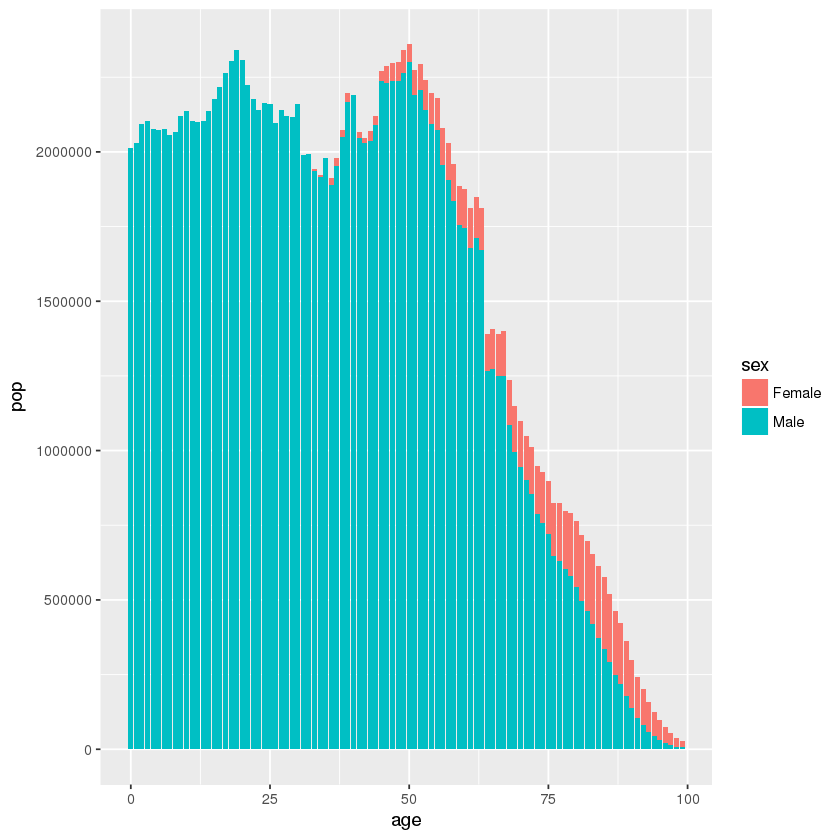

In [18]:
#Let's add males, too. 
ggplot(census, aes(x=age,y=pop, fill=sex)) + 
geom_bar(data = subset(census, sex=="Female"), stat = "identity") +
geom_bar(data = subset(census, sex=="Male"), stat = "identity")

# There is overlap.

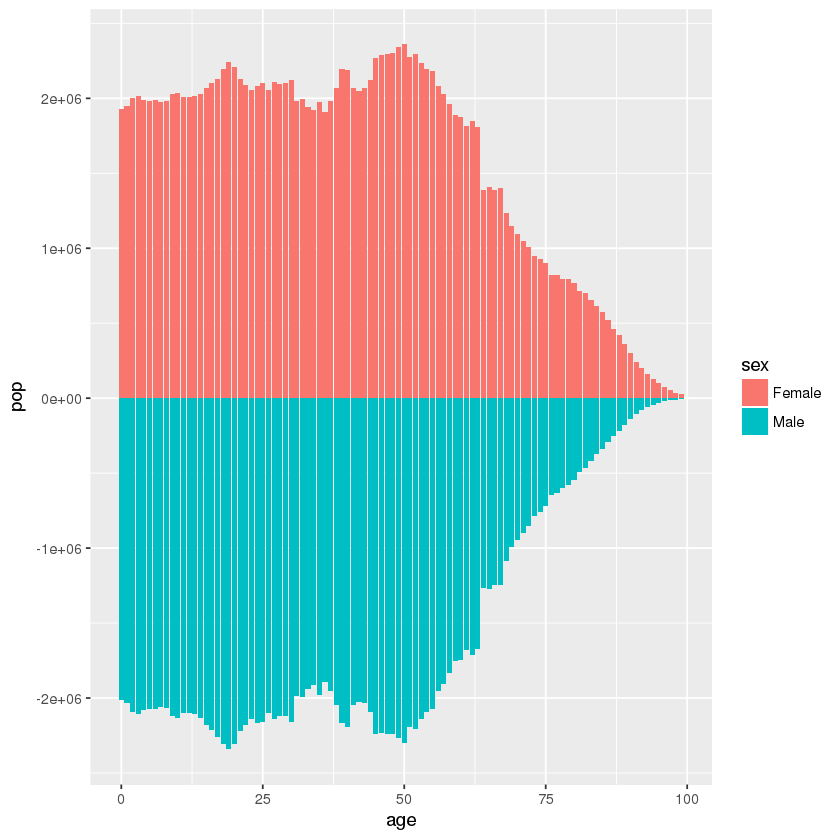

In [19]:
# We want males on the other side of the axis, so we can negate the population numbers to achieve that.
# We also use identity position to start them from zero, too.
ggplot(census, aes(x=age,y=pop, fill=sex)) + 
geom_bar(data = subset(census, sex=="Female"), stat = "identity") +
geom_bar(data = subset(census, sex=="Male"), stat = "identity", position = "identity", aes(y=-pop))

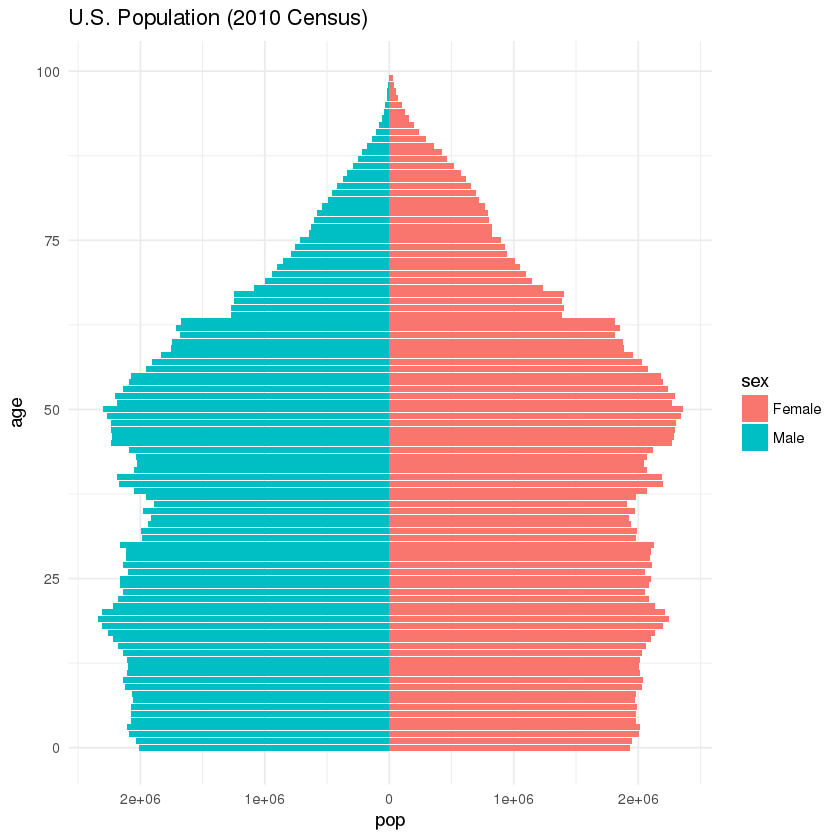

In [20]:
# And finally, let's flip the coords, use a better theme and adjust labels to positive. 
p <- ggplot(census, aes(x=age,y=pop, fill=sex)) + 
geom_bar(data = subset(census, sex=="Female"), stat = "identity") +
geom_bar(data = subset(census, sex=="Male"), stat = "identity", position = "identity", aes(y=-pop)) +
coord_flip() +
theme_minimal() +
scale_y_continuous(labels = abs) +
ggtitle("U.S. Population (2010 Census)")

p 

This is a greate example of a population pyramid. We achieved that by using different layers and components of the ggplot2. This modular approach makes it easy to create complicated plots by adding layers and manipulating different components of them. 

We could also create a pyramid by using plotly like following:


In [ ]:
#library(plotly)
#plot_ly(ncensus, x = ~npop, y = ~age, color =~sex) %>%
#  add_bars(orientation = "h",
#        hoverinfo = "y+text+name", text = ~pop,         
#        colors = c("pink", "lightblue")) %>%
#  layout(bargap = 0.1, barmode = "overlay", 
#         title = "Population", 
#         xaxis = list(tickmode = "array", 
#                      tickvals = c(-2000000, -1000000, 0, 1000000, 2000000 ),
#                      ticktext = c("2M", "1M", "0", "1M", "2M"), 
#                      title = "Population"), 
#         yaxis = list(title = "Age"))

We can use this type of plot for other purposes. Let's see an example where we compute the average life expectancy of continents over countries grouped by whether the life expectancy in that country is less than 65 or not. 

In [4]:
library(ggplot2)
co = read.csv("../../../datasets/census/countries.csv")

head(co)

Country..en.,Country..de.,Country..local.,Country.code,Continent,Capital,Population,Area,Coastline,Government.form,Currency,Currency.code,Dialing.prefix,Birthrate,Deathrate,Life.expectancy,Url
Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,NA,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.3,13.7,51.3,https://www.laenderdaten.info/Asien/Afghanistan/index.php
Egypt,Ägypten,Misr,EG,Africa,NA,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.3,4.7,72.7,https://www.laenderdaten.info/Afrika/Aegypten/index.php
Åland Islands,Ålandinseln,Åland,AX,Europe,NA,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.0,0.0,0.0,https://www.laenderdaten.info/Europa/Aland/index.php
Albania,Albanien,Shqipëria,AL,Europe,NA,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.1,6.7,78.3,https://www.laenderdaten.info/Europa/Albanien/index.php
Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,NA,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.0,4.3,76.8,https://www.laenderdaten.info/Afrika/Algerien/index.php
American Samoa,Amerikanisch Samoa,Amerika Samoa,AS,Oceania,NA,54194,199,116,Presidential democracy (self-governing territory of the US),Dollar,USD,1-684,22.9,4.8,75.4,https://www.laenderdaten.info/Ozeanien/Amerikanisch-Samoa/index.php


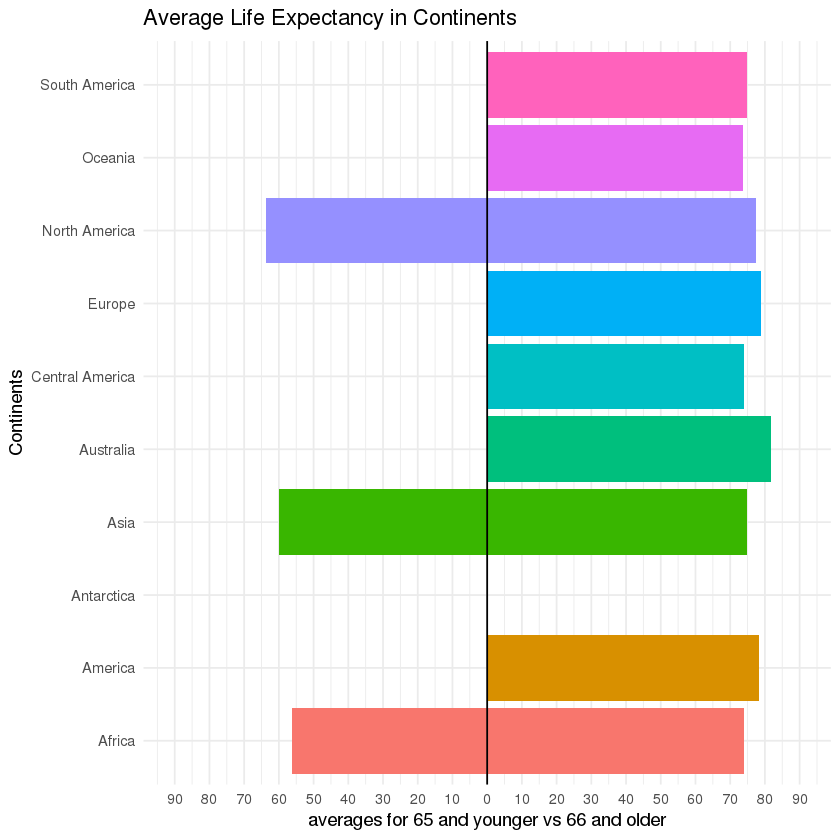

In [5]:
# we will have a bar plot with continents in x and life expectancy averages in y
ggplot(co, aes(x=as.factor(Continent), y=Life.expectancy, fill=Continent)) + 

# create two subsets by picking countries with >65 or <= 65 and compute the averages of each group per continent 
geom_bar(data = subset(co, Life.expectancy > 65), stat = "summary", fun.y = "mean") +
geom_bar(data = subset(co, Life.expectancy <= 65), stat = "summary", fun.y = "mean", position = "identity", aes(y=-Life.expectancy)) +

# put a zero line 
geom_abline(slope=0) +

# arrange the tick marks 
scale_y_continuous(labels = abs, limits=c(-90,90), breaks=seq(-90,90,10)) +

# flip the coord system 
coord_flip() +

# make it look nice 
ylab("averages for 65 and younger vs 66 and older") + xlab("Continents") +
theme_minimal() +
ggtitle("Average Life Expectancy in Continents") +
theme(legend.position="none")

In the above plot, left hand side shows the average life expectancy for continents averaged over those countries where life expectancy is less than 65. Those countries are apparently only in North America, Asia, and Africa. Right hand side shows the the same averaged over countries with life expectancy more than 65. 